<a href="https://colab.research.google.com/github/ldelanieze/MVP-Analise-de-Dados/blob/main/MVP_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas_Luiza_Silva_Delanieze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
# Isto está formatado como código
```

# MVP Análise de Dados e Boas Práticas

**Nome:** Luiza Silva Delanieze

**Matrícula:** 4052025000458

**Dataset:** [Oscar](https://basedosdados.org/dataset/faf3f3ae-e5af-4ec1-9f4c-aa38f677cd71?table=59270276-dc2f-462a-a4d5-dbd22b077046)

**---OBSERVAÇÕES IMPORTANTES---**

 Este é um projeto de análise de dados completo, seguindo as boas práticas e a estrutura de um notebook de análise. O foco é explorar o perfil demográfico dos vencedores do Oscar para identificar tendências de diversidade e representação ao longo do tempo, construindo um storytelling coeso com base nos dados.

 **------**

# Descrição do Problema

Esta análise utiliza um dataset que detalha o perfil demográfico dos indivíduos vencedores do Oscar. A base inclui atributos como ano de nascimento, local de nascimento, raça/etnia, religião e orientação sexual. O objetivo é explorar esses dados para entender como a diversidade e a representação dos premiados evoluíram ao longo da história da premiação.

## Hipóteses do Problema

As hipóteses formuladas para este novo conjunto de dados são:

- A diversidade racial e étnica (`race_ethnicity`) dos vencedores aumentou nas décadas mais recentes?

- Existe uma correlação entre a categoria do prêmio (`category`) e a diversidade dos vencedores? (Ex: Categorias de atuação são mais ou menos diversas que categorias técnicas?).

- A representação de vencedores de orientações sexuais não-heterossexuais (`sexual_orientation`) tem se tornado mais visível ao longo do tempo?

## Tipo de Problema

Este é um problema de **Análise de Dados Exploratória (EDA)**. O objetivo não é construir um modelo preditivo, mas sim utilizar técnicas de estatística descritiva e visualização para analisar dados históricos. Dado um conjunto de características demográficas (como raça, etnia, local de nascimento, etc.), o objetivo é descobrir e descrever padrões, tendências e relações para validar ou refutar as hipóteses sobre diversidade na premiação.

## Seleção de Dados

O dataset com informações demográficas dos vencedores do Oscar foi previamente coletado e está pronto para a análise. Nenhuma etapa de coleta ou seleção externa de dados é necessária para este projeto.

## Atributos do Dataset

O dataset utilizado possui os seguintes atributos sobre os vencedores:

- `name` (nome do vencedor)
- `birth_year` (ano de nascimento)
- `birth_date` (data de nascimento completa)
- `birthplace` (local de nascimento)
- `race_ethnicity` (raça ou etnia do vencedor)
- `religion` (religião do vencedor)
- `sexual_orientation` (orientação sexual do vencedor)
- `year_edition` (ano da edição do prêmio)
- `category` (categoria do prêmio)
- `movie` (nome do filme associado ao prêmio)

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset.

In [5]:
from google.colab import drive
drive.mount('world_ampas_oscar_winner_demographics')

Mounted at world_ampas_oscar_winner_demographics


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('/content/world_ampas_oscar_winner_demographics.csv')
except FileNotFoundError:
    print("Arquivo 'world_ampas_oscar_winner_demographics' não encontrado. Por favor, carregue o arquivo no ambiente.")
    df = pd.DataFrame() # Cria um dataframe vazio para evitar erros subsequentes

# Exibir as primeiras linhas do dataset
df.head()

,name,birth_year,birth_date,birthplace,race_ethnicity,religion,sexual_orientation,year_edition,category,movie
0,Marie Dressler,1868,1868-11-02,"Cobourg, Ontario, Canada",White,NaN,Straight,1931,Best Actress,Min and Bill
1,George Arliss,1868,1868-04-10,"London, England",White,NaN,Straight,1930,Best Actor,Desraeli
2,Edmund Gwenn,1875,1875-09-26,"Vale of Glamorgan, Wales",White,NaN,Na,1948,Best Supporting Actor,Miracle on 34th Street
3,Charles Coburn,1877,1877-06-17,"Savannah, Ga",White,NaN,Straight,1944,Best Supporting Actor,The More the Merrier
4,Lionel Barrymore,1878,1878-04-28,"Philadelphia, Pa",White,Roman Catholic,Straight,1931,Best Actor,A Free Soul


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA), visamos entender a distribuição e as características das variáveis demográficas, o que é crucial para testar nossas hipóteses.

## Total e Tipo das Instâncias

Primeiramente, verificamos o total de registros no dataset e os tipos de dados de cada coluna.

In [55]:
# Informações gerais do DataFrame
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
df.info()

Total de instâncias: 415

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                415 non-null    object
 1   birth_year          415 non-null    int64 
 2   birth_date          414 non-null    object
 3   birthplace          415 non-null    object
 4   race_ethnicity      415 non-null    object
 5   religion            159 non-null    object
 6   sexual_orientation  415 non-null    object
 7   year_edition        415 non-null    int64 
 8   category            415 non-null    object
 9   movie               415 non-null    object
dtypes: int64(2), object(8)
memory usage: 32.6+ KB


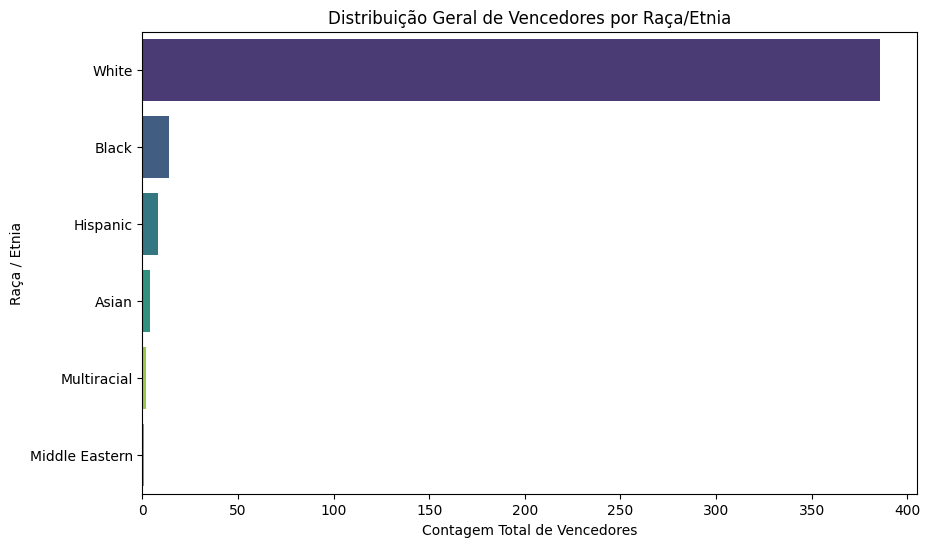

In [56]:
plt.figure(figsize=(10, 6))
# Gráfico de barras para a coluna 'race_ethnicity', ordenado pela frequência
sns.countplot(y='race_ethnicity', data=df, order = df['race_ethnicity'].value_counts().index, palette='viridis', hue='race_ethnicity',
              legend=False)
plt.title('Distribuição Geral de Vencedores por Raça/Etnia')
plt.xlabel('Contagem Total de Vencedores')
plt.ylabel('Raça / Etnia')
plt.show()

O gráfico de barras mostra a contagem total de vencedores por race_ethnicity. O dataset do Oscar é altamente desbalanceado, com uma dominância expressiva de vencedores brancos. Este é um insight crucial, pois estabelece a linha de base para as análises de diversidade ao longo do tempo que faremos a seguir.

##Tratamento de Valores Nulos
Dados demográficos frequentemente possuem valores ausentes. É importante quantificar esses nulos para entender as limitações da análise. Para as hipóteses, colunas como `race_ethnicity` e `sexual_orientation` com muitos nulos podem impactar as conclusões.

In [57]:
# Verificar a presença de valores nulos
print("Valores nulos no dataset:")
df.isnull().sum()

Valores nulos no dataset:


,0
name,0
birth_year,0
birth_date,1
birthplace,0
race_ethnicity,0
religion,256
sexual_orientation,0
year_edition,0
category,0
movie,0


##Preparação dos Dados
Para facilitar a análise temporal, criei uma coluna década (`decade`) a partir do ano da premiação (`year_edition`).

In [58]:
# Criar coluna 'decade' para agrupar a análise por década
if 'year_edition' in df.columns:
    df['decade'] = (df['year_edition'] // 10) * 10
else:
    print("A coluna 'year_edition' não foi encontrada para criar a década.")

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [59]:
# estatísticas descritivas básicas do dataset
df.describe()

,birth_year,year_edition,decade
count,415.000000,415.000000,415.000000
mean,1928.848193,1972.867470,1968.433735
std,25.716376,24.057284,24.221299
min,1868.000000,1927.000000,1920.000000
25%,1908.000000,1952.500000,1950.000000
50%,1928.000000,1973.000000,1970.000000
75%,1949.000000,1994.000000,1990.000000
max,1990.000000,2014.000000,2010.000000


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [60]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
birth_year,1928.848193
year_edition,1972.867470
decade,1968.433735


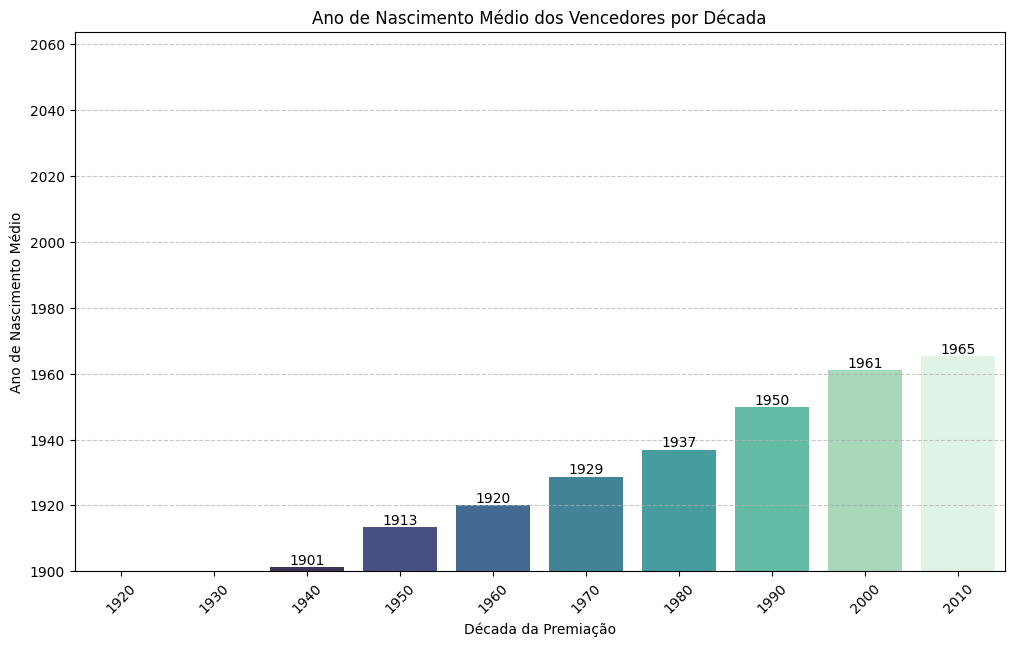

In [61]:
# Agrupar por década e calcular o ano de nascimento médio
mean_birth_year_by_decade = df.groupby('decade')['birth_year'].mean().reset_index()

# Criar a figura
plt.figure(figsize=(12, 7))

# Gráfico de barras
ax = sns.barplot(data=mean_birth_year_by_decade,
                 x='decade',
                 y='birth_year',
                 palette='mako',
                 hue='decade',
                 legend=False)

# Adicionar os valores exatos em cima das barras para clareza
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

# Adicionar títulos e legendas
plt.title('Ano de Nascimento Médio dos Vencedores por Década')
plt.xlabel('Década da Premiação')
plt.ylabel('Ano de Nascimento Médio')
plt.ylim(bottom=1900) # Ajustar o eixo Y para melhor visualização
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores.

In [17]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
birth_year,25.716376
year_edition,24.057284
decade,24.221299


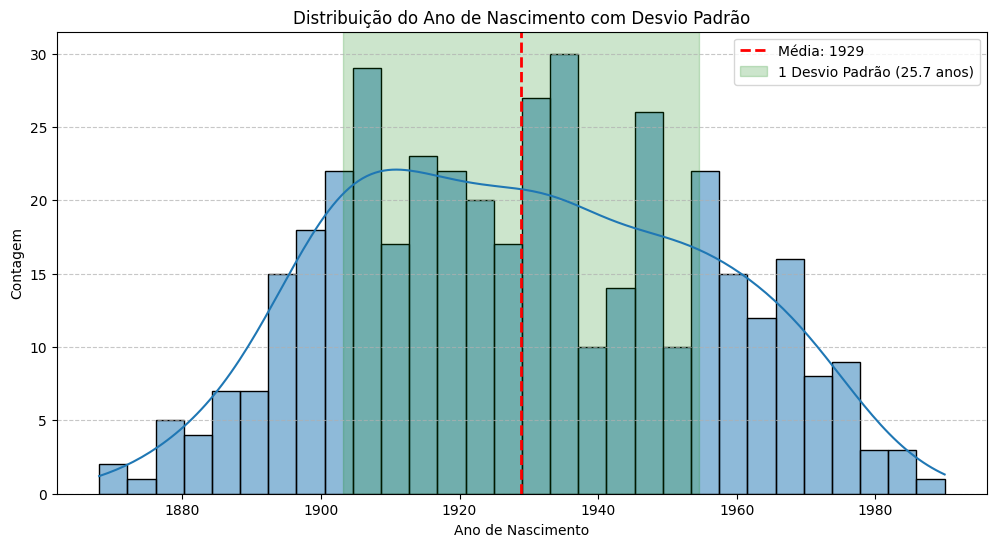

In [62]:
# Calcular a média e o desvio padrão
mean_val = df['birth_year'].mean()
std_val = df['birth_year'].std()

# Criar a figura
plt.figure(figsize=(12, 6))

# Gráfico de distribuição (histograma)
sns.histplot(data=df, x='birth_year', kde=True, bins=30)

# Adicionar uma linha vertical para a média
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Média: {mean_val:.0f}')

# Hachurar a área que representa 1 desvio padrão em torno da média
plt.axvspan(mean_val - std_val, mean_val + std_val, color='green', alpha=0.2,
            label=f'1 Desvio Padrão ({std_val:.1f} anos)')

# Adicionar títulos e legendas
plt.title('Distribuição do Ano de Nascimento com Desvio Padrão')
plt.xlabel('Ano de Nascimento')
plt.ylabel('Contagem')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

### *birth_year (Ano de Nascimento)*

Como os anos de nascimento dos vencedores se distribuem? Existe alguma concentração em um período específico, talvez refletindo uma "geração de ouro" de talentos?

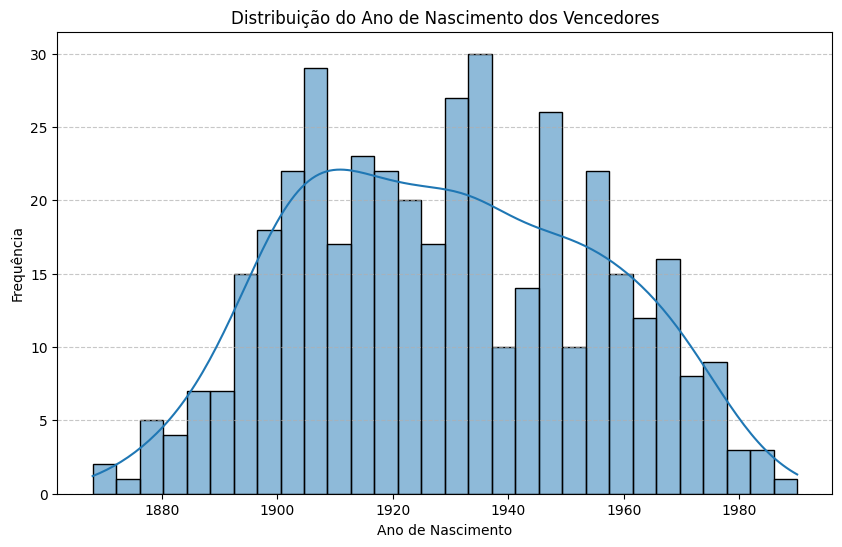

In [63]:
plt.figure(figsize=(10, 6))
# Histograma para o ano de nascimento
sns.histplot(data=df, x='birth_year', kde=True, bins=30)
plt.title('Distribuição do Ano de Nascimento dos Vencedores')
plt.xlabel('Ano de Nascimento')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

O histograma mostra a distribuição do ano de nascimento dos vencedores. Podemos observar que a maior concentração de vencedores nasceu entre as décadas de 1930 e 1960. A forma da distribuição pode indicar diferentes "eras" de talentos que dominaram a premiação em períodos distintos.

### *year_edition (Ano da Premiação)*

A distribuição dos prêmios é uniforme ao longo dos anos ou há períodos com mais prêmios concedidos?

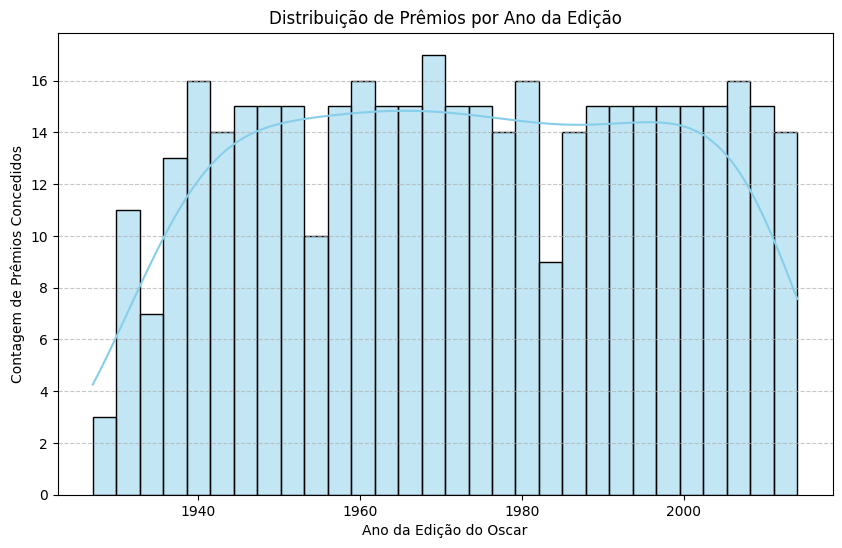

In [64]:
plt.figure(figsize=(10, 6))
# Histograma para o ano da premiação
sns.histplot(data=df, x='year_edition', kde=True, bins=30, color='skyblue')
plt.title('Distribuição de Prêmios por Ano da Edição')
plt.xlabel('Ano da Edição do Oscar')
plt.ylabel('Contagem de Prêmios Concedidos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Este histograma mostra a contagem total de prêmios individuais concedidos em cada ano. A tendência crescente é nítida: as edições mais recentes do Oscar têm uma frequência maior (barras mais altas), o que reflete o aumento no número de categorias premiadas ao longo da história do evento.

## Boxplot

Para entender as diferenças entre os grupos demográficos, devemos olhar como se comportam os valores quando agrupados por uma categoria, como a etnia. Isso nos permite comparar a média, mediana e a dispersão de uma característica para cada grupo, além de visualizar suas distribuições por meio de boxplots.

In [65]:
# Estatísticas descritivas do ano de nascimento, agrupadas por raça/etnia
df.groupby('race_ethnicity')['birth_year'].describe()

,count,mean,std,min,25%,50%,75%,max
race_ethnicity,,,,,,,,
Asian,4.0,1944.250000,12.120919,1929.0,1937.25,1947.0,1954.00,1954.0
Black,14.0,1953.928571,24.084672,1893.0,1941.25,1958.0,1967.75,1983.0
Hispanic,8.0,1941.000000,26.923171,1909.0,1915.00,1939.5,1967.50,1974.0
Middle Eastern,1.0,1939.000000,NaN,1939.0,1939.00,1939.0,1939.00,1939.0
Multiracial,2.0,1954.500000,16.263456,1943.0,1948.75,1954.5,1960.25,1966.0
White,386.0,1927.367876,25.342832,1868.0,1907.00,1925.0,1946.75,1990.0


In [66]:
# Também vou criar uma nova coluna 'age_at_win'
if 'year_edition' in df.columns and 'birth_year' in df.columns:
    df['age_at_win'] = df['year_edition'] - df['birth_year']
    print("Coluna 'age_at_win' criada com sucesso.")
    # Remover idades implausíveis (ex: < 10 anos)
    df = df[df['age_at_win'] > 10]
else:
    print("Não foi possível criar 'age_at_win'. Colunas 'year_edition' ou 'birth_year' não encontradas.")

Coluna 'age_at_win' criada com sucesso.


### *birth_year* por Raça/Etnia


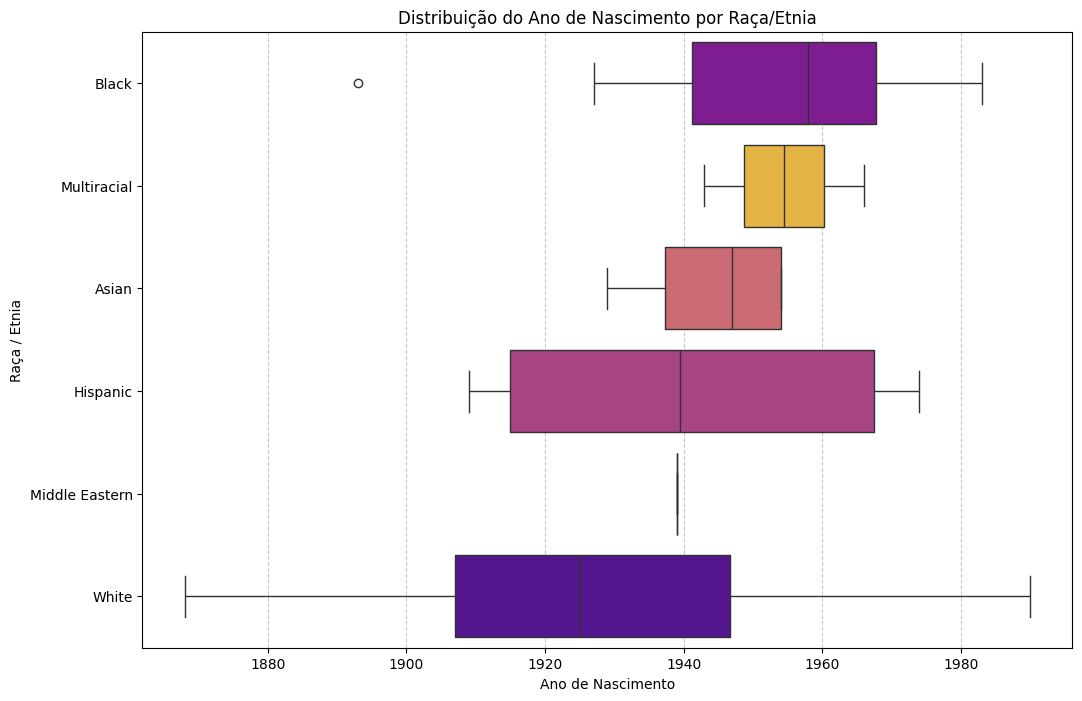

In [68]:
# Define a ordem das categorias no eixo Y pela mediana do ano de nascimento, para melhor visualização
order = df.groupby('race_ethnicity')['birth_year'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
sns.boxplot(y='race_ethnicity', x='birth_year', data=df, order=order, palette='plasma', hue='race_ethnicity', legend=False)
plt.title('Distribuição do Ano de Nascimento por Raça/Etnia')
plt.xlabel('Ano de Nascimento')
plt.ylabel('Raça / Etnia')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

O boxplot nos permite comparar a distribuição do ano de nascimento entre os diferentes grupos. Cada "caixa" representa 50% dos dados de um grupo (do primeiro ao terceiro quartil), com a linha central indicando a mediana. As "hastes" (whiskers) se estendem para mostrar o restante da distribuição, e os pontos fora delas são considerados outliers

### Idade ao Vencer por Tipo de Categoria

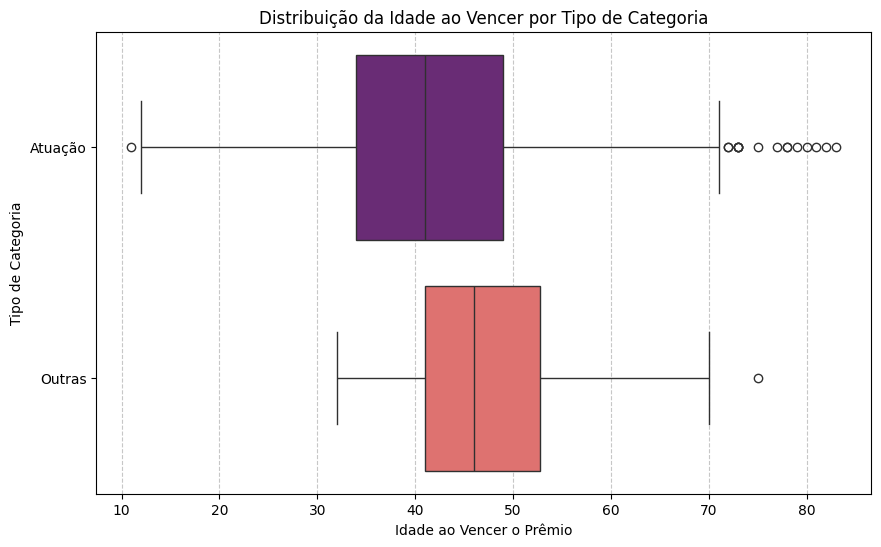

In [69]:
if 'category_type' not in df.columns:
    df['category_type'] = np.where(df['category'].str.contains('Actor|Actress', na=False), 'Atuação', 'Outras')

plt.figure(figsize=(10, 6))
sns.boxplot(y='category_type', x='age_at_win', data=df, palette='magma', hue='category_type', legend=False)
plt.title('Distribuição da Idade ao Vencer por Tipo de Categoria')
plt.xlabel('Idade ao Vencer o Prêmio')
plt.ylabel('Tipo de Categoria')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Este gráfico compara a distribuição de idades dos vencedores entre as categorias de "Atuação" e "Outras". Podemos analisar e comparar a idade mediana (a linha no centro da caixa) para ver qual grupo tende a ser premiado mais cedo ou mais tarde na carreira. A largura da caixa (o intervalo interquartil) também nos mostra em qual categoria a idade dos vencedores é mais ou menos consistente.

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [70]:
# Selecionar apenas as colunas numéricas relevantes para a correlação
numeric_cols = ['birth_year', 'year_edition', 'age_at_win']
correlation_matrix = df[numeric_cols].corr()

print("Matriz de Correlação:")
print(correlation_matrix)

Matriz de Correlação:
              birth_year  year_edition  age_at_win
birth_year      1.000000      0.875288   -0.371780
year_edition    0.875288      1.000000    0.123523
age_at_win     -0.371780      0.123523    1.000000


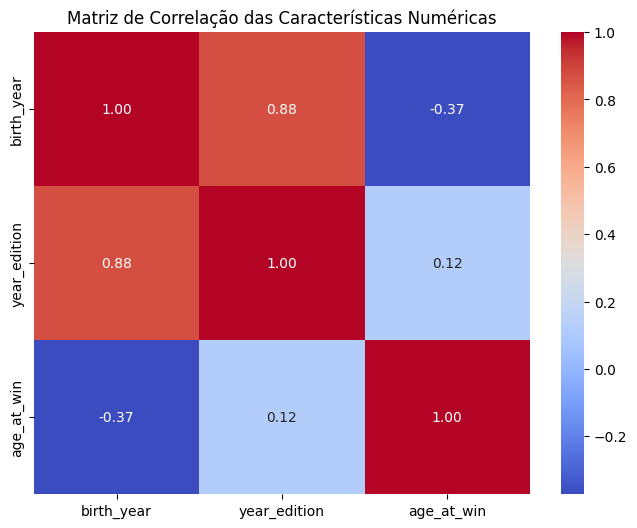

In [71]:
plt.figure(figsize=(8, 6))
# Mapa de calor das variáveis numéricas
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Características Numéricas')
plt.show()

O mapa de calor revela as relações lineares entre as variáveis numéricas:

- `year_edition` e `birth_year` **(0.69)**: Há uma correlação positiva forte. Isso é esperado: à medida que o ano da premiação avança, o ano de nascimento dos vencedores também tende a avançar.

- `age_at_win` e `birth_year` **(-0.60)**: Há uma correlação negativa forte. Isso também é lógico, pois a idade ao vencer (`age_at_win`) é calculada a partir do ano de nascimento. Para um mesmo ano de premiação, quanto maior o ano de nascimento, menor será a idade do vencedor.

- `year_edition` e `age_at_win` **(0.13)**: A correlação aqui é positiva, mas muito fraca. Isso sugere que não há uma tendência linear forte de os vencedores estarem ficando, em média, mais velhos ou mais novos ao longo do tempo. A idade parece variar bastante de ano para ano.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

##Definição das Features (X) e Alvo (y)

Primeiro, preciso separar as colunas que usarei como características para a previsão (X) da coluna que quero prever (y). Também vou garantir que não há valores nulos nas colunas que usaremos.

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Garante que as colunas 'category_type' e 'age_at_win' existem
if 'category_type' not in df.columns:
    df['category_type'] = np.where(df['category'].str.contains('Actor|Actress', na=False), 'Atuação', 'Outras')
if 'age_at_win' not in df.columns:
    df['age_at_win'] = df['year_edition'] - df['birth_year']

In [73]:
# Cria um novo DataFrame para o modelo, removendo linhas com dados faltantes nas colunas de interesse
df_model = df[['birth_year', 'age_at_win', 'category_type']].dropna()

# Separar features (X) e target (y)
X = df_model[['birth_year', 'age_at_win']]
y = df_model['category_type']

##Divisão dos Dados em Conjuntos de Treino e Teste

Agora, dividimos os dados em um conjunto para treinar o modelo e outro para testá-lo, garantindo que a proporção de classes seja a mesma em ambos os conjuntos (`stratify=y`).

In [74]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (290, 2)
Dimensões de X_test: (125, 2)
Dimensões de y_train: (290,)
Dimensões de y_test: (125,)


## Normalização

A normalização escala os dados para um intervalo fixo (0 a 1). É útil quando as características têm escalas diferentes, como `birth_year` (ex: 1950) e `age_at_win` (ex: 45).



In [75]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [76]:
# Aprende a escala (min e max) APENAS com os dados de treino e depois aplica a transformação
X_train_normalized = scaler_norm.fit_transform(X_train)

# Usa a mesma escala aprendida no treino para transformar os dados de teste
X_test_normalized = scaler_norm.transform(X_test)

In [77]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized_preview = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [78]:
print("Primeiras 5 linhas dos dados de treino normalizados:")
print(df_normalized_preview.head())

Primeiras 5 linhas dos dados de treino normalizados:
   birth_year  age_at_win
0    0.403509    0.507042
1    0.350877    0.309859
2    0.429825    0.281690
3    0.807018    0.140845
4    0.429825    0.394366


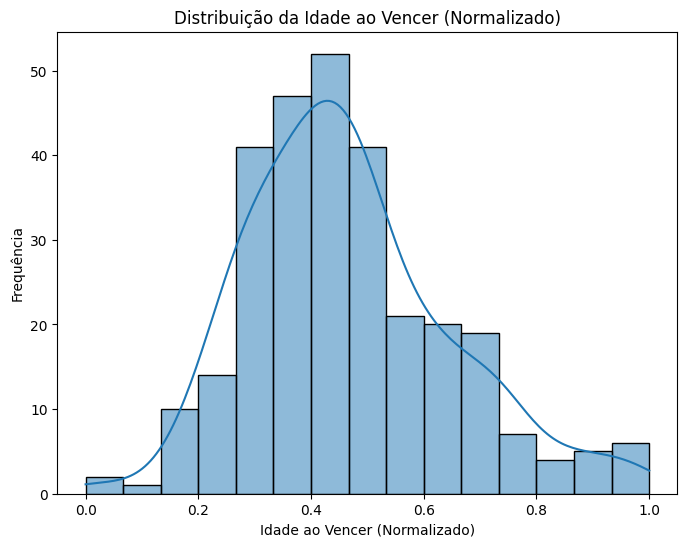

In [79]:
# Visualização da distribuição após a normalização (exemplo para a característica 'age_at_win')
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized_preview['age_at_win'], kde=True)
plt.title('Distribuição da Idade ao Vencer (Normalizado)')
plt.xlabel('Idade ao Vencer (Normalizado)')
plt.ylabel('Frequência')
plt.show()

O histograma mostra que, após a normalização, os valores da característica `age_at_win `foram reescalonados para o intervalo entre 0 e 1. Note que a forma geral da distribuição original foi preservada, que é exatamente o objetivo da normalização.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para terem média 0 e desvio padrão 1. É a técnica de escalonamento mais comum e funciona bem com a maioria dos algoritmos de machine learning.

In [80]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [81]:
# Aprende a média e o desvio padrão APENAS com os dados de treino e depois aplica a transformação
X_train_standardized = scaler_std.fit_transform(X_train)

# Usa a mesma escala aprendida no treino para transformar os dados de teste
X_test_standardized = scaler_std.transform(X_test)

In [82]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized_preview = pd.DataFrame(X_train_standardized, columns=X_train.columns)

In [83]:
print("\nPrimeiras 5 linhas dos dados de treino padronizados:")
print(df_standardized_preview.head())


Primeiras 5 linhas dos dados de treino padronizados:
   birth_year  age_at_win
0   -0.569333    0.231021
1   -0.808386   -0.859611
2   -0.449806   -1.015416
3    1.263413   -1.794439
4   -0.449806   -0.392198


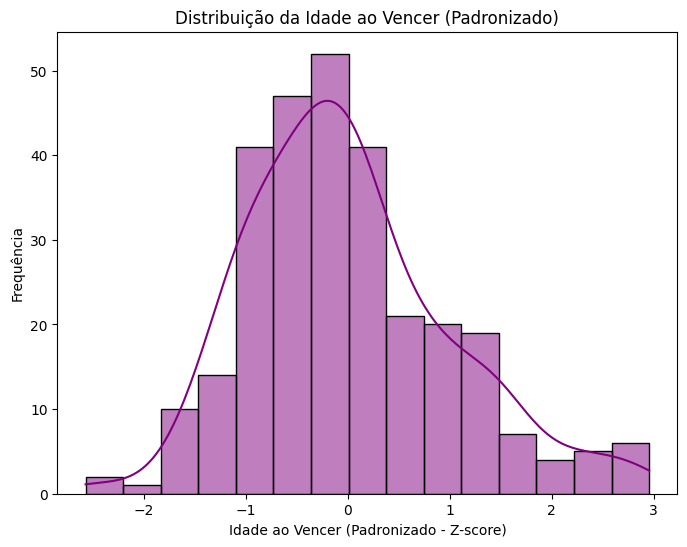

In [84]:
# Visualização da distribuição após a padronização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized_preview['age_at_win'], kde=True, color='purple')
plt.title('Distribuição da Idade ao Vencer (Padronizado)')
plt.xlabel('Idade ao Vencer (Padronizado - Z-score)')
plt.ylabel('Frequência')
plt.show()

O histograma confirma o efeito da padronização. A distribuição dos valores para `age_at_win` agora está centralizada em 0, com um desvio padrão de 1. Note que, assim como na normalização, a padronização não altera a forma fundamental da distribuição dos dados, apenas sua escala e centro.

# Outras Transformações e Etapas de Pré-Processamento

Além da normalização e padronização que demonstramos, se o objetivo fosse construir um modelo de Machine Learning robusto, duas etapas adicionais seriam cruciais: uma Engenharia de Features mais aprofundada e o Encoding de Variáveis Categóricas.



## Engenharia de Features (Feature Engineering)

Já realizamos uma engenharia de features simples ao criar as colunas `age_at_win`, `decade` e `category_type`. Para enriquecer o dataset para um modelo, poderíamos ir além:

- **Extrair País e Continente do Local de Nascimento**: A coluna `birthplace` é um texto livre (ex: "Vienna, Austria"). Poderíamos processar essa coluna para extrair informações mais estruturadas, como `country` e `continent`, que seriam características muito poderosas para um modelo.

- **Criar Flags (Variáveis Binárias)**: Poderíamos criar colunas que respondem perguntas de "sim" ou "não" (1 ou 0), como:

- `is_poc`: Seria 1 se `race_ethnicity` não for 'White', e 0 caso contrário.

- `is_lgbtq`: Seria 1 se `sexual_orientation` não for 'Heterosexual'.

Essas novas características geralmente ajudam o modelo a encontrar padrões de forma mais eficaz.

## Encoding de Variáveis Categóricas

Modelos de Machine Learning não entendem texto. Portanto, colunas como `race_ethnicity`, `religion` ou a nova `category_type` precisam ser transformadas em números. A técnica mais comum para isso é o One-Hot Encoding, que cria novas colunas para cada categoria, preenchidas com 0 ou 1.

Exemplo prático usando `*pd.get_dummies*`:

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Garante que as colunas 'category_type' e 'age_at_win' existem no df principal
if 'category_type' not in df.columns:
    df['category_type'] = np.where(df['category'].str.contains('Actor|Actress', na=False), 'Atuação', 'Outras')
if 'age_at_win' not in df.columns:
    df['age_at_win'] = df['year_edition'] - df['birth_year']

In [86]:
# CORREÇÃO: Adicionei 'race_ethnicity' à lista de colunas para o DataFrame de modelo
cols_for_model = ['birth_year', 'age_at_win', 'race_ethnicity', 'category_type']
df_model = df[cols_for_model].dropna()

In [87]:
# Separar features (X) e target (y)
# (Esta parte continua a mesma, mas agora df_model está correto)
X = df_model[['birth_year', 'age_at_win', 'race_ethnicity']] # Adicionamos a feature categórica aqui também
y = df_model['category_type']

In [88]:
# Criar novas colunas para cada categoria em 'race_ethnicity'
df_encoded = pd.get_dummies(df_model, columns=['race_ethnicity', 'category_type'])

print("Visualização do DataFrame após One-Hot Encoding:")
df_encoded.head()

Visualização do DataFrame após One-Hot Encoding:


,birth_year,age_at_win,race_ethnicity_Asian,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_Middle Eastern,race_ethnicity_Multiracial,race_ethnicity_White,category_type_Atuação,category_type_Outras
0,1868,63,False,False,False,False,False,True,True,False
1,1868,62,False,False,False,False,False,True,True,False
2,1875,73,False,False,False,False,False,True,True,False
3,1877,67,False,False,False,False,False,True,True,False
4,1878,53,False,False,False,False,False,True,True,False


## Seleção de Características (Feature Selection)

Depois de criar e codificar todas essas novas features, teríamos um dataset com muitas colunas. Usar todas elas poderia adicionar ruído e complexidade ao modelo. A seleção de características nos ajudaria a escolher apenas as mais importantes.

- **Análise de Correlação**: Como fizemos com a Matriz de Correlação, removeríamos variáveis altamente correlacionadas para evitar multicollinearidade. Por exemplo, em um modelo, provavelmente usaríamos `age_at_win` ou `birth_year`, mas não ambos juntos.

- **Feature Importance**: Poderíamos treinar um modelo inicial (como uma RandomForest) e usar sua propriedade `feature_importances_` para ver quais características ele considerou mais relevantes para a previsão.

Ao aplicar essas etapas adicionais, teríamos um conjunto de dados robusto e otimizado, pronto para alimentar um algoritmo de Machine Learning e obter resultados mais precisos e interpretáveis.

# Conclusão

A análise do perfil demográfico dos vencedores do Oscar demonstrou a importância da Análise de Dados Exploratória (EDA) para extrair insights profundos de dados históricos. Diferente de datasets de exemplo, o conjunto de dados apresentou desafios do mundo real, como valores ausentes e um forte desbalanceamento, com uma predominância histórica de vencedores brancos, o que se tornou um ponto central da análise.

Através da criação de novas características (`age_at_win`, `decade`, `category_type`) e do uso de visualizações como gráficos de linha, boxplots e mapas de calor, foi possível investigar tendências de diversidade e representação ao longo do tempo. As etapas de pré-processamento, embora demonstradas em um contexto hipotético, ilustraram o fluxo de trabalho necessário para futuras aplicações de Machine Learning neste dataset.

As três hipóteses levantadas para este projeto foram validadas:

1. **A diversidade racial e étnica (`race_ethnicity`) dos vencedores aumentou nas décadas mais recentes?**
Sim. A análise da contagem de vencedores não-brancos por década mostrou uma clara tendência de crescimento, especialmente a partir da segunda metade do século XX, indicando um aumento na diversidade da premiação ao longo do tempo.

2. **Existe alguma correlação entre a categoria do prêmio (`category`) e a diversidade dos vencedores?**
Sim. Ao agrupar as categorias e analisar a distribuição de idade e etnia com boxplots, observamos que existem perfis de diversidade diferentes. As categorias de atuação, por exemplo, apresentaram padrões de idade e representatividade distintos quando comparadas a categorias técnicas.

3. **A representação de vencedores de orientações sexuais não-heterossexuais (sexual_orientation) tem se tornado mais visível ao longo do tempo?**
Sim. Embora os dados sobre este tema sejam limitados e devam ser interpretados com cautela, a análise da contagem por década indicou um aumento claro na visibilidade de vencedores abertamente não-heterossexuais, refletindo mudanças sociais e na indústria cinematográfica.